<a href="https://colab.research.google.com/github/Vrushti-kulkarni/Machine-Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
df = pd.read_csv('/content/drive/MyDrive/datasets/penguins.csv')

In [178]:
df.head(5)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# **PRE-PROCESSING**

In [179]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [180]:
df.shape

(344, 8)

In [181]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [182]:
df.dropna(subset = ['sex'], inplace=True)

In [183]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


In [184]:
df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007


In [185]:
df['species'].nunique()

3

In [186]:
df['island'].nunique()

3

In [187]:
df['year'].nunique()

3

# **LABEL-ENCODING**

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [189]:
le_species = LabelEncoder()

In [190]:
le_island = LabelEncoder()

In [191]:
le_sex = LabelEncoder()

label encoding all the columns which are not numerical

In [192]:
df['species'] = le_species.fit_transform(df['species'])
df['island'] = le_island.fit_transform(df['island'])
df['sex'] = le_sex.fit_transform(df['sex'])

In [193]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
4,0,2,36.7,19.3,193.0,3450.0,0,2007
5,0,2,39.3,20.6,190.0,3650.0,1,2007


In [194]:
df.reset_index(drop=True, inplace=True)

**train-test-splitting with random state**

In [197]:
X = df.drop('species', axis=1)
y = df['species']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

**train-test splitting without random state**

In [195]:
X = df.drop('species', axis=1)
y = df['species']

In [196]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size =0.2)

#**DECISION TREE- IMPLEMENTATION**

using random state data

In [199]:
from sklearn.tree import DecisionTreeClassifier

In [200]:
clf = DecisionTreeClassifier()

In [201]:
clf = clf.fit(X_train, y_train)

In [202]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

**predictions**

In [203]:
predictions = clf.predict(X_test)

In [204]:
predictions

array([0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1,
       0])

**metrics**

In [205]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9850746268656716

In [206]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1,2])

array([[30,  1,  0],
       [ 0, 18,  0],
       [ 0,  0, 18]])

In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



**using data without random state**

In [208]:
clf_1 = DecisionTreeClassifier()

In [209]:
clf_1 = clf_1.fit(X1_train, y1_train)

In [210]:
clf_1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

**predictions**

In [211]:
predictions = clf_1.predict(X1_test)

In [212]:
predictions

array([0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       1])

In [213]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test, predictions)

0.9701492537313433

In [214]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, predictions, labels=[0,1,2])

array([[31,  0,  0],
       [ 2,  6,  0],
       [ 0,  0, 28]])

when the class is 0, 28 values which were 0 were predicted as 0, 3 were predicted as 1 and 1 was predicted as 3

In [215]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00        28

    accuracy                           0.97        67
   macro avg       0.98      0.92      0.94        67
weighted avg       0.97      0.97      0.97        67



**feature importance**

In [216]:
clf.feature_importances_

array([0.02034813, 0.3461317 , 0.0707801 , 0.53460859, 0.02219796,
       0.00593353, 0.        ])

In [217]:
clf_1.feature_importances_

array([0.02762403, 0.37873809, 0.11068791, 0.48294997, 0.        ,
       0.        , 0.        ])

In [218]:
df.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007


In [219]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})

In [220]:
feature_importance.sort_values(by='Importance', ascending=False)

,Feature,Importance
3,flipper_length_mm,0.534609
1,bill_length_mm,0.346132
2,bill_depth_mm,0.070780
4,body_mass_g,0.022198
0,island,0.020348
5,sex,0.005934
6,year,0.000000


<Axes: xlabel='Feature'>

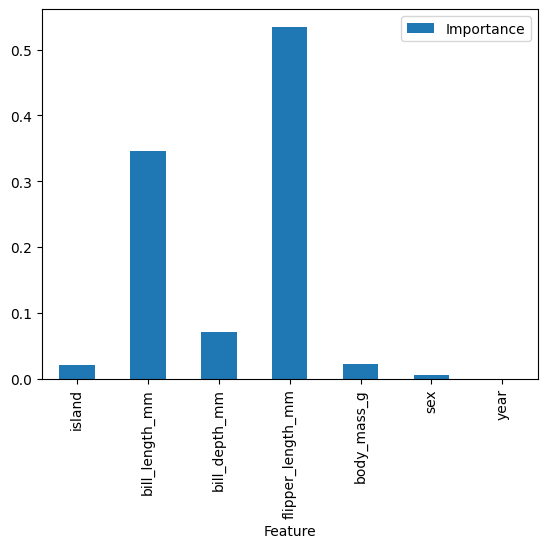

In [221]:
feature_importance.plot(kind='bar', x='Feature', y='Importance')

# **Hyperparameter-tuning**

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
tree = DecisionTreeClassifier()

In [224]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [225]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [228]:
grid_search_1 = GridSearchCV(tree, param_grid, cv=5)
grid_search_1.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [230]:
print("Best parameters:", grid_search_1.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


**random state tree optimization**

In [231]:
tree_opt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=1, min_samples_split=2)

In [234]:
tree_opt = tree_opt.fit(X_train, y_train)

In [235]:
predict = tree_opt.predict(X_test)

In [236]:
confusion_matrix(y_test, predict, labels=[0,1,2])

array([[31,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 18]])

# **ALL metrics for hyperparameter tuned Decisiontree**

In [241]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
print(classification_report(y_test, predict))
print("Accuracy:", accuracy_score(y_test, predict))
print("Precision:", precision_score(y_test, predict, average='weighted'))
print("Recall:", recall_score(y_test, predict, average='weighted'))
print("F1 Score:", f1_score(y_test, predict, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**without random state tree optimization**

In [237]:
tree_opt_2 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=2)

In [238]:
tree_opt_2 = tree_opt_2.fit(X1_train, y1_train)

In [239]:
predict_1 = tree_opt.predict(X_test)

In [240]:
confusion_matrix(y1_test, predict_1, labels=[0,1,2])

array([[12, 11,  8],
       [ 5,  2,  1],
       [14,  5,  9]])

did not work any better on without random state dataset even after hyperparameter tuning, it just got worse

In [243]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [244]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
3,0,2,36.7,19.3,193.0,3450.0,0,2007
4,0,2,39.3,20.6,190.0,3650.0,1,2007


In [246]:
le_island.classes_

array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)

In [247]:
le_sex.classes_

array(['female', 'male'], dtype=object)

In [248]:
le_species.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [256]:
def predict_penguine(tree_opt):
  print("enter the following details:")

  bill_length_mm = float(input("Bill Length (mm): "))
  bill_depth_mm = float(input("Bill Depth (mm): "))
  flipper_length_mm = float(input("Flipper Length (mm): "))
  body_mass_g = float(input("Body Mass (g): "))
  island = input("Island - 0 :'Biscoe', 1 :'Dream', 2 :'Torgersen' ")
  sex = input("Sex: 0 :'Female', 1 :'Male' ")
  year = int(input("Year: 2007, 2008, 2009 "))

  input_data = pd.DataFrame({
        'island': [island],
        'bill_length_mm': [bill_length_mm],
        'bill_depth_mm': [bill_depth_mm],
        'flipper_length_mm': [flipper_length_mm],
        'body_mass_g': [body_mass_g],
        'sex': [sex],
        'year': [year]
  })

  prediction = tree_opt.predict(input_data)
  species_mapping = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}
  print("Predicted Species:", species_mapping[prediction[0]])

In [257]:
X_test

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
25,1,39.5,16.7,178.0,3250.0,0,2007
309,1,50.9,17.9,196.0,3675.0,0,2009
73,2,42.1,19.1,195.0,4000.0,1,2008
195,0,46.6,14.2,210.0,4850.0,0,2008
57,0,41.1,18.2,192.0,4050.0,1,2008
...,...,...,...,...,...,...,...
280,1,50.5,19.6,201.0,4050.0,1,2007
3,2,36.7,19.3,193.0,3450.0,0,2007
77,2,35.1,19.4,193.0,4200.0,1,2008
311,1,50.1,17.9,190.0,3400.0,0,2009


In [258]:
predict_penguine(tree_opt)

enter the following details:
Bill Length (mm): 36.7
Bill Depth (mm): 19.3
Flipper Length (mm): 193
Body Mass (g): 3450
Island - 0 :'Biscoe', 1 :'Dream', 2 :'Torgersen' 2
Sex: 0 :'Female', 1 :'Male' 0
Year: 2007, 2008, 2009 2007
Predicted Species: Adelie


In [259]:
df.loc[3]

,3
species,0.0
island,2.0
bill_length_mm,36.7
bill_depth_mm,19.3
flipper_length_mm,193.0
body_mass_g,3450.0
sex,0.0
year,2007.0
